# CIFAR-10 Object Recognition



https://www.kaggle.com/c/cifar-10/code

In [1]:
from keras.datasets import cifar10

import matplotlib.pyplot as plt
from keras import models,layers
from tensorflow.keras.utils import to_categorical
from keras import optimizers

In [2]:
(xtrain, ytrain), (xtest, ytest) = cifar10.load_data()
print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)
(50000, 1)
(10000, 1)


In [3]:
# convert the pixel values in float
xtrain = xtrain.astype('float32')
xtest = xtest.astype('float32')
# scale the images
xtrain /= 255  # ths is eqvalent to xtrain = xtrain/255 
xtest /= 255
ytrain = to_categorical(ytrain)
ytest = to_categorical(ytest)   

In [4]:
labels=['airplane', 'automobile','bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


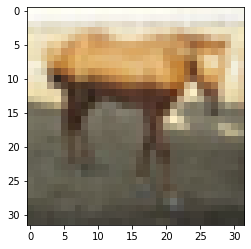

In [5]:
#explore data
print(ytrain[2000])
plt.imshow(xtrain[2000])
plt.show()

In [6]:
from datetime import datetime
def timer(start_time=None):
    if not start_time:
        print(datetime.now())
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

In [7]:
print(xtrain[10])

[[[0.20784314 0.25490198 0.20784314]
  [0.21176471 0.24705882 0.20392157]
  [0.21960784 0.23529412 0.19607843]
  ...
  [0.18431373 0.2        0.19607843]
  [0.16078432 0.1764706  0.17254902]
  [0.09411765 0.10980392 0.10588235]]

 [[0.18039216 0.23137255 0.16078432]
  [0.20784314 0.24313726 0.1764706 ]
  [0.21176471 0.23137255 0.17254902]
  ...
  [0.16470589 0.18039216 0.1764706 ]
  [0.15294118 0.16862746 0.16470589]
  [0.10980392 0.1254902  0.12156863]]

 [[0.1764706  0.23137255 0.14901961]
  [0.19607843 0.23529412 0.16078432]
  [0.18039216 0.20392157 0.13333334]
  ...
  [0.14901961 0.16470589 0.16078432]
  [0.14117648 0.15686275 0.15294118]
  [0.11372549 0.12941177 0.1254902 ]]

 ...

 [[0.2784314  0.3254902  0.25882354]
  [0.2901961  0.3254902  0.25882354]
  [0.3137255  0.33333334 0.2627451 ]
  ...
  [0.2        0.21176471 0.12941177]
  [0.18039216 0.19215687 0.13333334]
  [0.19215687 0.19607843 0.16078432]]

 [[0.29411766 0.32156864 0.2627451 ]
  [0.30980393 0.33333334 0.27058825]


In [8]:
ytrain[10]

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.], dtype=float32)

## Creating the Model Layers

In [9]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(32,32,3)))
model.add(layers.Conv2D(32,(3,3), padding='same',activation='relu'))
model.add(layers.MaxPooling2D(pool_size=2)) 
model.add(layers.Dropout(0.2))

model.add(layers.Conv2D(64,(3,3), padding='same',activation='relu'))
model.add(layers.Conv2D(128,(3,3), padding='same',activation='relu'))
model.add(layers.MaxPooling2D(pool_size=2)) 
model.add(layers.Dropout(0.2))

model.add(layers.Conv2D(64,(3,3), padding='same',activation='relu'))
model.add(layers.Conv2D(64,(3,3), padding='same',activation='relu'))
model.add(layers.MaxPooling2D(pool_size=2)) 
model.add(layers.Dropout(0.2))

#Classification layers
model.add(layers.Flatten())
model.add(layers.Dense(512,activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(10,activation='softmax'))  # this is the actual output layer

# initiate Adam optimizer
opt = optimizers.Adam(learning_rate=1e-4, decay=1e-6)

# Let's train the model 
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])


## Viewing the Model Summary

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 128)         0

## Fitting the Model

In [11]:
start_time=timer(None)
result = model.fit(
    xtrain,
    ytrain,
    validation_split=0.1,    
    verbose=True,
    epochs=125,
    steps_per_epoch= 64,
    batch_size=512
    )
timer(start_time)

2021-07-31 14:09:42.877233
Epoch 1/125
64/64 [==============================] - 21s 66ms/step - loss: 2.2923 - accuracy: 0.1154 - val_loss: 2.0805 - val_accuracy: 0.2270
Epoch 2/125
64/64 [==============================] - 4s 62ms/step - loss: 2.0810 - accuracy: 0.2230 - val_loss: 1.9673 - val_accuracy: 0.2928
Epoch 3/125
64/64 [==============================] - 3s 46ms/step - loss: 1.9688 - accuracy: 0.2804 - val_loss: 1.8098 - val_accuracy: 0.3646
Epoch 4/125
64/64 [==============================] - 3s 46ms/step - loss: 1.8392 - accuracy: 0.3283 - val_loss: 1.7014 - val_accuracy: 0.3844
Epoch 5/125
64/64 [==============================] - 3s 47ms/step - loss: 1.7562 - accuracy: 0.3562 - val_loss: 1.6218 - val_accuracy: 0.4160
Epoch 6/125
64/64 [==============================] - 3s 46ms/step - loss: 1.6964 - accuracy: 0.3828 - val_loss: 1.5585 - val_accuracy: 0.4442
Epoch 7/125
64/64 [==============================] - 3s 47ms/step - loss: 1.6321 - accuracy: 0.4048 - val_loss: 1.5359 -

##Visualizing the performance

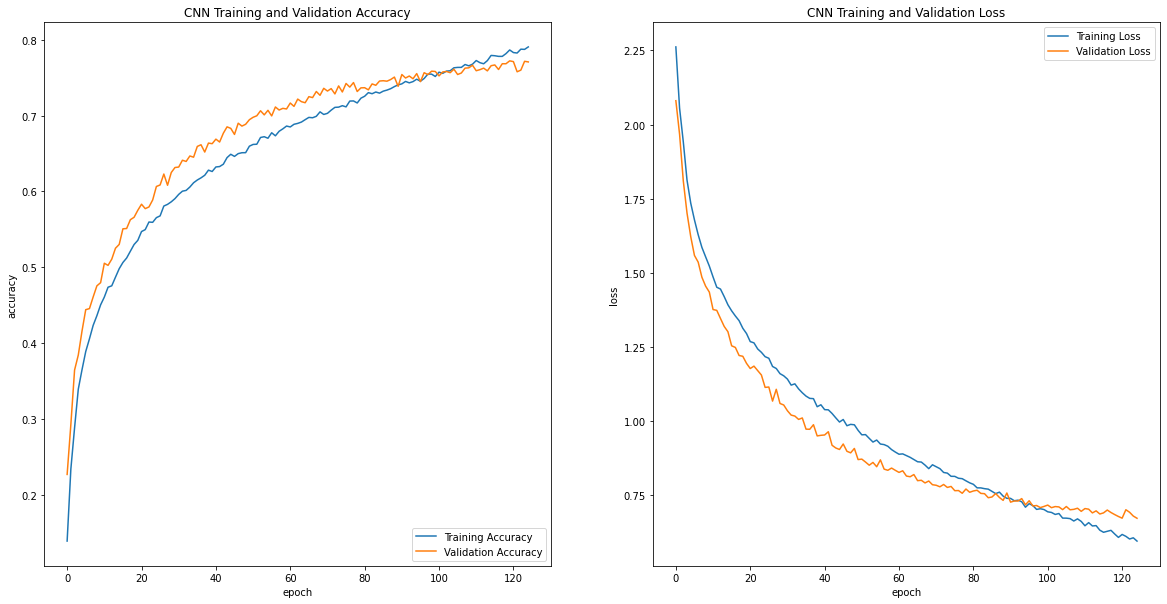

In [12]:
plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
plt.title("CNN Training and Validation Accuracy")
plt.plot(result.history["accuracy"], label='Training Accuracy')
plt.plot(result.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.subplot(1, 2, 2)
plt.plot( result.history["loss"], label='Training Loss')
plt.plot( result.history["val_loss"], label='Validation Loss')
plt.legend(loc='upper right')
plt.title('CNN Training and Validation Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

## Check performance on test

In [13]:
# check performance on test
scores = model.evaluate(xtest, ytest, verbose=1) 
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

313/313 [==============================] - 1s 3ms/step - loss: 0.7058 - accuracy: 0.7556
Test loss: 0.7057846188545227
Test accuracy: 0.7555999755859375


## Result: 

### So the model's final Training Accuracy is 79% 

### Validation Accuracy is 77% 

### Testing Accuracy is 76%